In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import rand_score, silhouette_score, pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from tqdm import tqdm

%load_ext memory_profiler

# Clustering

In [2]:
embeddings = np.load("../data/desc_embeddings.npy")

In [3]:
embeddings.shape

(3957, 768)

## KMeans / Agglomerative

In [4]:
kmeans = KMeans(n_clusters=8).fit(embeddings)
kmeans.labels_

array([1, 4, 4, ..., 6, 2, 7], dtype=int32)

In [5]:
agglo = AgglomerativeClustering(n_clusters=8).fit(embeddings)
agglo.labels_

array([1, 0, 0, ..., 3, 4, 2])

In [6]:
rand_score(kmeans.labels_, agglo.labels_)

0.7995064741726849

## Evaluate number of clusters

In [7]:
# Change distance measure
kmeans_scores = []
agglo_scores = []
for k in tqdm(range(2, 20)):
    # kmeans = KMeans(n_clusters=k).fit(embeddings)
    agglo = AgglomerativeClustering(n_clusters=k, affinity="cosine", linkage="average").fit(embeddings)
    
    # kmeans_scores.append(silhouette_score(embeddings, kmeans.labels_))
    agglo_scores.append(silhouette_score(embeddings, agglo.labels_, metric="cosine"))

100%|███████████████████████████████████████████| 18/18 [01:16<00:00,  4.24s/it]


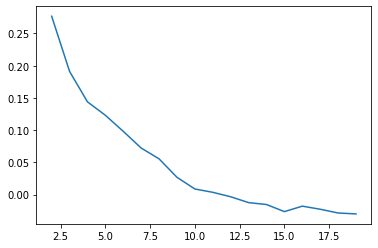

In [8]:
plt.plot(range(2, 20), agglo_scores)
plt.show()

# Distance

## Cosine distance matrix

In [9]:
distances = pairwise_distances(embeddings, metric="cosine")
distances

array([[0.        , 0.4420445 , 0.30319822, ..., 0.46510243, 0.5349331 ,
        0.46883273],
       [0.4420445 , 0.        , 0.42606002, ..., 0.4710933 , 0.39620996,
        0.48555213],
       [0.30319822, 0.42606002, 0.        , ..., 0.48039508, 0.42858094,
        0.51548684],
       ...,
       [0.46510243, 0.4710933 , 0.48039508, ..., 0.        , 0.4409545 ,
        0.52650416],
       [0.5349331 , 0.39620996, 0.42858094, ..., 0.4409545 , 0.        ,
        0.5030469 ],
       [0.46883273, 0.48555213, 0.51548684, ..., 0.52650416, 0.5030469 ,
        0.        ]], dtype=float32)

In [10]:
%memit pairwise_distances(embeddings, metric="cosine")

peak memory: 327.81 MiB, increment: 61.04 MiB


In [11]:
np.fill_diagonal(distances, np.inf)
distances

array([[       inf, 0.4420445 , 0.30319822, ..., 0.46510243, 0.5349331 ,
        0.46883273],
       [0.4420445 ,        inf, 0.42606002, ..., 0.4710933 , 0.39620996,
        0.48555213],
       [0.30319822, 0.42606002,        inf, ..., 0.48039508, 0.42858094,
        0.51548684],
       ...,
       [0.46510243, 0.4710933 , 0.48039508, ...,        inf, 0.4409545 ,
        0.52650416],
       [0.5349331 , 0.39620996, 0.42858094, ..., 0.4409545 ,        inf,
        0.5030469 ],
       [0.46883273, 0.48555213, 0.51548684, ..., 0.52650416, 0.5030469 ,
               inf]], dtype=float32)

In [12]:
df = pd.read_csv("../data/ted_talks_preprocessed.csv")
df[df.speaker == "Bill Gates"]

,talk_id,title,speaker,occupations,about_speaker,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript
367,451,"Mosquitos, malaria and education",Bill Gates,['philanthropist'],"A passionate techie and a shrewd businessman, ...",4933059,2009-02-02,2009-02-05,TED2009,"['ar', 'az', 'bg', 'cs', 'de', 'el', 'en', 'es...",493,1216,"['business', 'education', 'health', 'illness',...","[499, 62, 58, 1739, 1667, 1734]",Bill Gates hopes to solve some of the world's ...,I wrote a letter last week talking about the w...
594,767,Innovating to zero!,Bill Gates,['philanthropist'],"A passionate techie and a shrewd businessman, ...",6187754,2010-02-12,2010-02-18,TED2010,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'es...",1027,1669,"['business', 'energy', 'global issues', 'inven...","[51, 451, 2441, 1460, 2583, 22628]","At TED2010, Bill Gates unveils his vision for ...",I'm going to talk today about energy and clima...
844,1087,How state budgets are breaking US schools,Bill Gates,['philanthropist'],"A passionate techie and a shrewd businessman, ...",2078908,2011-03-03,2011-03-04,TED2011,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",239,616,"['aging', 'education', 'money', 'youth']","[451, 1728, 1739, 1638, 1735, 1855]",America's school systems are funded by the 50 ...,"Well, this is about state budgets. This is pro..."
1449,1739,Teachers need real feedback,Bill Gates,['philanthropist'],"A passionate techie and a shrewd businessman, ...",4240980,2013-05-07,2013-05-08,TED Talks Education,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'et...",418,624,"['culture', 'education', 'global issues', 'tea...","[1728, 1087, 1965, 1731, 1667, 3592]","Until recently, many teachers only got one wor...",Everyone needs a coach. It doesn't matter whet...
1888,2225,The next outbreak? We're not ready,Bill Gates,['philanthropist'],"A passionate techie and a shrewd businessman, ...",33521780,2015-03-18,2015-04-03,TED2015,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",439,512,"['disaster relief', 'disease', 'ebola', 'globa...","[61301, 60872, 41456, 2177, 60084, 2425]","In 2014, the world avoided a global outbreak o...","When I was a kid, the disaster we worried abou..."
3925,61301,How we must respond to the coronavirus pandemic,Bill Gates,['philanthropist'],"A passionate techie and a shrewd businessman, ...",6144695,2020-03-24,2020-03-25,TED Connects,['en'],230,3110,"['health care', 'disease', 'virus', 'medicine'...","[2225, 60872, 41456, 61303, 60873, 62149]",Philanthropist and Microsoft cofounder Bill Ga...,Whitney Pennington Rodgers: Hello and welcome ...


## Similar talks based on the description

In [13]:
cum_distances = (distances[1888] + distances[3925]) / 2
np.argsort(cum_distances)[:5]

array([3953, 3935, 3840, 3939, 3927])

In [14]:
df.iloc[3953]

talk_id                                                       62748
title                  A global pandemic calls for global solutions
speaker                                             Larry Brilliant
occupations                    ['epidemiologist', 'philanthropist']
about_speaker     TED Prize winner Larry Brilliant has spent his...
views                                                        760969
recorded_date                                            2020-04-22
published_date                                           2020-04-24
event                                          TED2020: The Prequel
available_lang                          ['en', 'es', 'it', 'pt-br']
comments                                                         37
duration                                                        941
topics            ['coronavirus', 'pandemic', 'epidemiology', 'v...
related_talks                 [58, 61303, 62149, 60084, 2185, 2317]
description       Examining the facts and figure